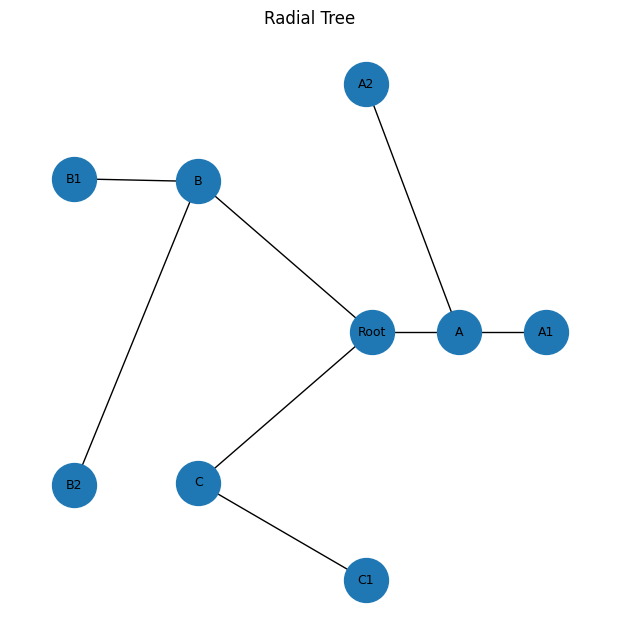

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math

edges = [
    ("Root","A"), ("Root","B"), ("Root","C"),
    ("A","A1"), ("A","A2"),
    ("B","B1"), ("B","B2"),
    ("C","C1")
]
G = nx.DiGraph(edges)

# Compute depths (BFS from root)
root = "Root"
depth = {root: 0}
for u, v in nx.bfs_edges(G, root):
    depth[v] = depth[u] + 1

# Group nodes by depth, distribute angles per depth
levels = {}
for n, d in depth.items():
    levels.setdefault(d, []).append(n)

pos = {}
max_depth = max(depth.values())
for d, nodes in levels.items():
    r = (d + 1) / (max_depth + 2)  # radius 0..1
    for i, n in enumerate(nodes):
        theta = 2 * math.pi * (i / max(1, len(nodes)))
        pos[n] = (r * math.cos(theta), r * math.sin(theta))

plt.figure(figsize=(6,6))
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=9, arrows=False)
plt.title("Radial Tree")
plt.axis('equal')
plt.show()